In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

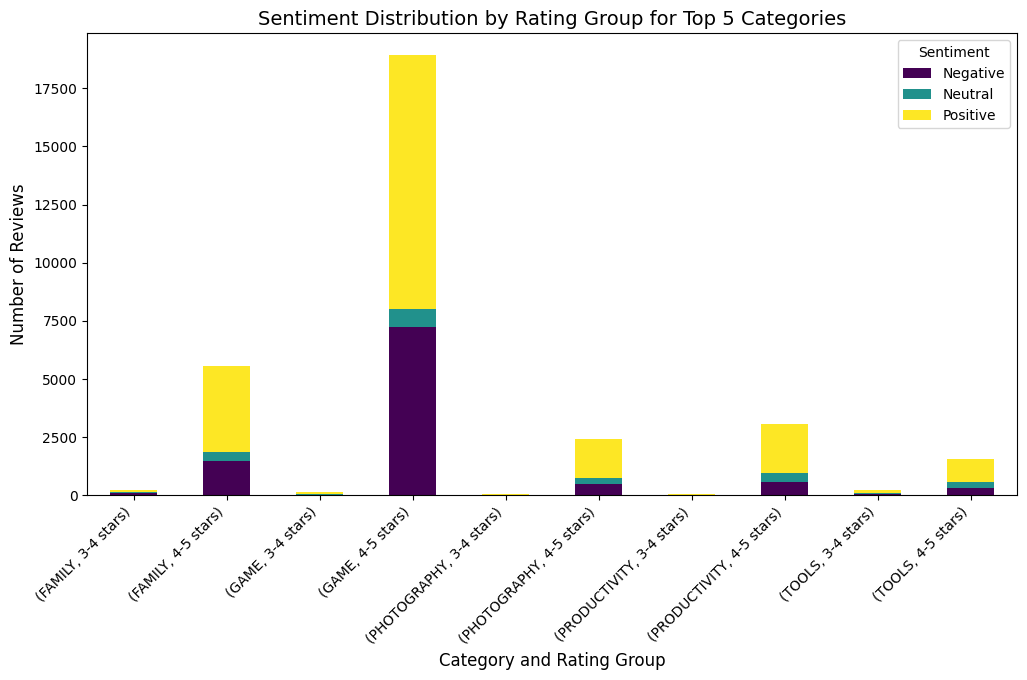

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


play_store_file = "Play Store Data.csv"
user_reviews_file = "User Reviews.csv"

if not os.path.exists(play_store_file):
    raise FileNotFoundError(f"File not found: {play_store_file}")
if not os.path.exists(user_reviews_file):
    raise FileNotFoundError(f"File not found: {user_reviews_file}")


play_store_data = pd.read_csv(play_store_file)
user_reviews_data = pd.read_csv(user_reviews_file)


play_store_data["Reviews"] = pd.to_numeric(play_store_data["Reviews"], errors="coerce")

filtered_apps = play_store_data[play_store_data["Reviews"] > 1000]

top_categories = filtered_apps["Category"].value_counts().head(5).index


filtered_apps = filtered_apps[filtered_apps["Category"].isin(top_categories)]

def categorize_rating(rating):
    if pd.isna(rating):
        return np.nan
    elif rating >= 1 and rating < 3:
        return "1-2 stars"
    elif rating >= 3 and rating < 4:
        return "3-4 stars"
    elif rating >= 4 and rating <= 5:
        return "4-5 stars"
    return np.nan


filtered_apps["Rating Group"] = filtered_apps["Rating"].apply(categorize_rating)


merged_data = pd.merge(filtered_apps, user_reviews_data, on="App", how="inner")


merged_data = merged_data.dropna(subset=["Sentiment", "Rating Group"])


sentiment_distribution = merged_data.groupby(["Category", "Rating Group", "Sentiment"]).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))
sentiment_distribution.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))


plt.xlabel("Category and Rating Group", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Sentiment Distribution by Rating Group for Top 5 Categories", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")


plt.show()
